<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

## Document Details ## 

Name : Anant Kumar Srinrangam <br>
Date : 15th Sept 2018 <br>
Project : Data Science - NYC 311


In [1]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb
%matplotlib inline

In [2]:
# Read the file NYC 311

data = pd.read_csv('/Users/cyber/Downloads/Projects (1)/Projects for Submission/Project3_NYC311/data.csv')
data.head()

/Users/cyber/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [124]:
# Observing the size and shape of the data

print data.size
print data.shape
print data.describe()

17498784
(364558, 48)
         Unique Key   Incident Zip  X Coordinate (State Plane)  \
count  3.645580e+05  364558.000000                3.645580e+05   
mean   3.106595e+07   10862.826442                1.005223e+06   
std    7.331531e+05     577.840143                2.190815e+04   
min    2.960737e+07      83.000000                9.133570e+05   
25%    3.049938e+07   10314.000000                9.920590e+05   
50%    3.108795e+07   11209.000000                1.003728e+06   
75%    3.167433e+07   11249.000000                1.020108e+06   
max    3.231065e+07   11697.000000                1.067186e+06   

       Y Coordinate (State Plane)       Latitude      Longitude  
count               364558.000000  364558.000000  364558.000000  
mean                203849.838744      40.726145     -73.924295  
std                  29947.207828       0.082195       0.079015  
min                 121185.000000      40.499040     -74.254937  
25%                 183271.000000      40.669629     

In [4]:
# Getting list of dataframe columns

cols = pd.DataFrame(data.columns)
cols.columns=['Columns']
print cols.sort_values(['Columns'])

                           Columns
15                    Address Type
3                           Agency
4                      Agency Name
24                         Borough
44        Bridge Highway Direction
43             Bridge Highway Name
46          Bridge Highway Segment
16                            City
2                      Closed Date
23                 Community Board
5                   Complaint Type
1                     Created Date
11                  Cross Street 1
12                  Cross Street 2
6                       Descriptor
20                        Due Date
18                   Facility Type
48                 Ferry Direction
49             Ferry Terminal Name
47                 Garage Lot Name
9                 Incident Address
8                     Incident Zip
13           Intersection Street 1
14           Intersection Street 2
17                        Landmark
50                        Latitude
52                        Location
7                   

In [3]:
# Filling missing values with 'N/A'

dataNA = data.fillna('N/A')

# Looking at vehicle vs complaint type data
vehicleComplaint = dataNA[dataNA['Vehicle Type']!='N/A']
vehicleComplaint.size

0

## Inference ##

Complaint type has no relation with Vehicle Type so we can drop Vehicle Type column

In [6]:
# Looking at agency types

agencyComplaint = data.groupby(['Agency']).size().reset_index(name='Count')
print agencyComplaint


  Agency   Count
0   NYPD  364558


## Inference ##

All the data belongs to NYPD

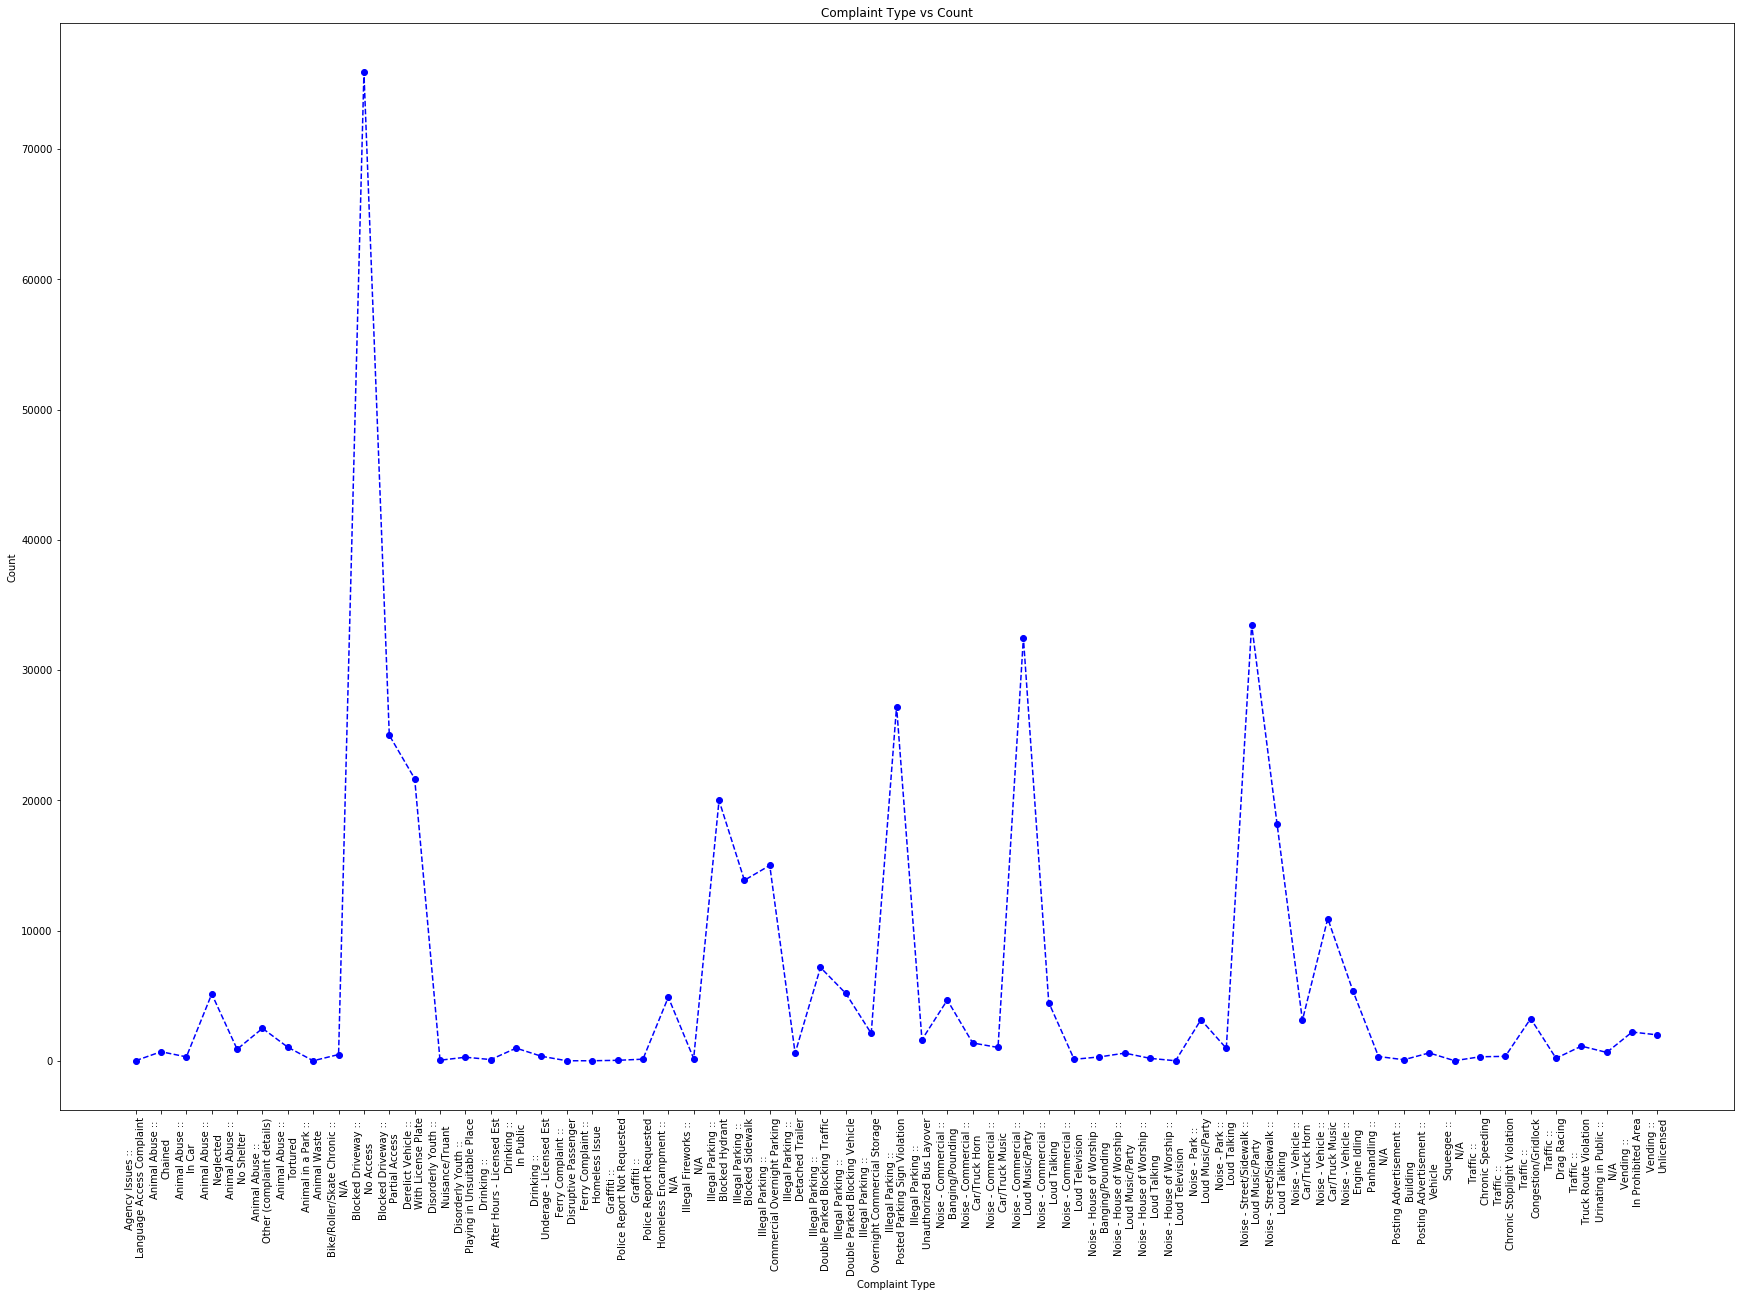

               Complaint Type                      Descriptor  Count
9            Blocked Driveway                       No Access  75888
44    Noise - Street/Sidewalk                Loud Music/Party  33488
35         Noise - Commercial                Loud Music/Party  32479
30            Illegal Parking   Posted Parking Sign Violation  27200
10           Blocked Driveway                  Partial Access  24993
11           Derelict Vehicle              With License Plate  21661
23            Illegal Parking                 Blocked Hydrant  19989
45    Noise - Street/Sidewalk                    Loud Talking  18204
25            Illegal Parking    Commercial Overnight Parking  14997
24            Illegal Parking                Blocked Sidewalk  13860
47            Noise - Vehicle                 Car/Truck Music  10919
27            Illegal Parking  Double Parked Blocking Traffic   7164
48            Noise - Vehicle                   Engine Idling   5323
28            Illegal Parking  Dou

In [5]:
# Printing complaint type with description

complaintDesc =  dataNA.groupby(['Complaint Type','Descriptor']).size().reset_index(name='Count')
xaxis = []
yaxis = complaintDesc['Count']
compType = complaintDesc['Complaint Type']
descType = complaintDesc['Descriptor']

for i in range(len(compType)):
    xaxis.append(compType.iloc[i]+" :: \n"+descType.iloc[i])
    
plot.plot(xaxis,yaxis,'bo--')
plot.xlabel('Complaint Type')
plot.ylabel('Count')
plot.title('Complaint Type vs Count')
plot.xticks(range(len(xaxis)),xaxis,rotation='vertical')
plot.rcParams["figure.figsize"] = (30,20)
plot.show()
print complaintDesc.sort_values(['Count'],ascending=False)

## Inference ##

Maximum Complaints from Blocked Driveway : No Access

In [10]:
complaintIncident = dataNA.groupby(['Incident Address']).size().reset_index(name='Count')
print(complaintIncident.sort_values('Count',ascending=False))

               Incident Address  Count
125304                      N/A  51699
13219         1207 BEACH AVENUE   1014
45506             2117 3 AVENUE    660
108995  78-15 PARSONS BOULEVARD    637
116743          89 MOORE STREET    512
44950        210 EAST 46 STREET    389
11688       1175 BEDFORD AVENUE    370
88878        514 WEST 44 STREET    362
29311             1585 BROADWAY    321
35367         177 LAREDO AVENUE    314
67177     32-72 STEINWAY STREET    294
186              1 NAGLE AVENUE    265
54770       248 WEST 132 STREET    265
96633         608 DEGRAW STREET    263
98282         622 DEGRAW STREET    249
117015    89-21 ELMHURST AVENUE    235
121183         95 HALSEY STREET    231
91866         550 EAST 4 STREET    223
124012                 BROADWAY    221
100198        65 SHERMAN AVENUE    219
67288       320 STERLING STREET    214
123543      990 ATLANTIC AVENUE    209
40528     196-12 JAMAICA AVENUE    205
57842        263 SHERMAN AVENUE    202
52257     2360 AMSTERDAM 

## Inference ##

Maximum complaints from not so known area or isolated areas
After that 1207 Beach Avenue seems to be most disturbed

In [63]:
# Display City and Complaint Type

cityComplaint = data[['City','Complaint Type']].sort_values('City').groupby(['City','Complaint Type']).size().reset_index(name='Count')
print(cityComplaint)


          City             Complaint Type  Count
0      ARVERNE               Animal Abuse     46
1      ARVERNE           Blocked Driveway     50
2      ARVERNE           Derelict Vehicle     32
3      ARVERNE           Disorderly Youth      2
4      ARVERNE                   Drinking      1
5      ARVERNE                   Graffiti      1
6      ARVERNE        Homeless Encampment      4
7      ARVERNE            Illegal Parking     62
8      ARVERNE         Noise - Commercial      2
9      ARVERNE   Noise - House of Worship     14
10     ARVERNE               Noise - Park      2
11     ARVERNE    Noise - Street/Sidewalk     29
12     ARVERNE            Noise - Vehicle     10
13     ARVERNE                Panhandling      1
14     ARVERNE                    Traffic      1
15     ARVERNE        Urinating in Public      1
16     ARVERNE                    Vending      1
17     ASTORIA               Animal Abuse    170
18     ASTORIA  Bike/Roller/Skate Chronic     16
19     ASTORIA      

                   City   Count
7              BROOKLYN  118862
33             NEW YORK   77312
6                 BRONX   49171
47        STATEN ISLAND   15340
25              JAMAICA    8932
1               ASTORIA    7991
17             FLUSHING    7487
40            RIDGEWOOD    6392
11               CORONA    5383
51             WOODSIDE    4357
12        EAST ELMHURST    3558
35           OZONE PARK    3446
13             ELMHURST    3438
45  SOUTH RICHMOND HILL    3431
30              MASPETH    3118
50            WOODHAVEN    3103
28     LONG ISLAND CITY    3028
44     SOUTH OZONE PARK    2668
19        FRESH MEADOWS    2453
39        RICHMOND HILL    2335
31       MIDDLE VILLAGE    2291
37       QUEENS VILLAGE    2251
18         FOREST HILLS    2122
24      JACKSON HEIGHTS    2106
38            REGO PARK    1807
3               BAYSIDE    1550
10        COLLEGE POINT    1544
15         FAR ROCKAWAY    1397
49           WHITESTONE    1369
21               HOLLIS    1231
22      

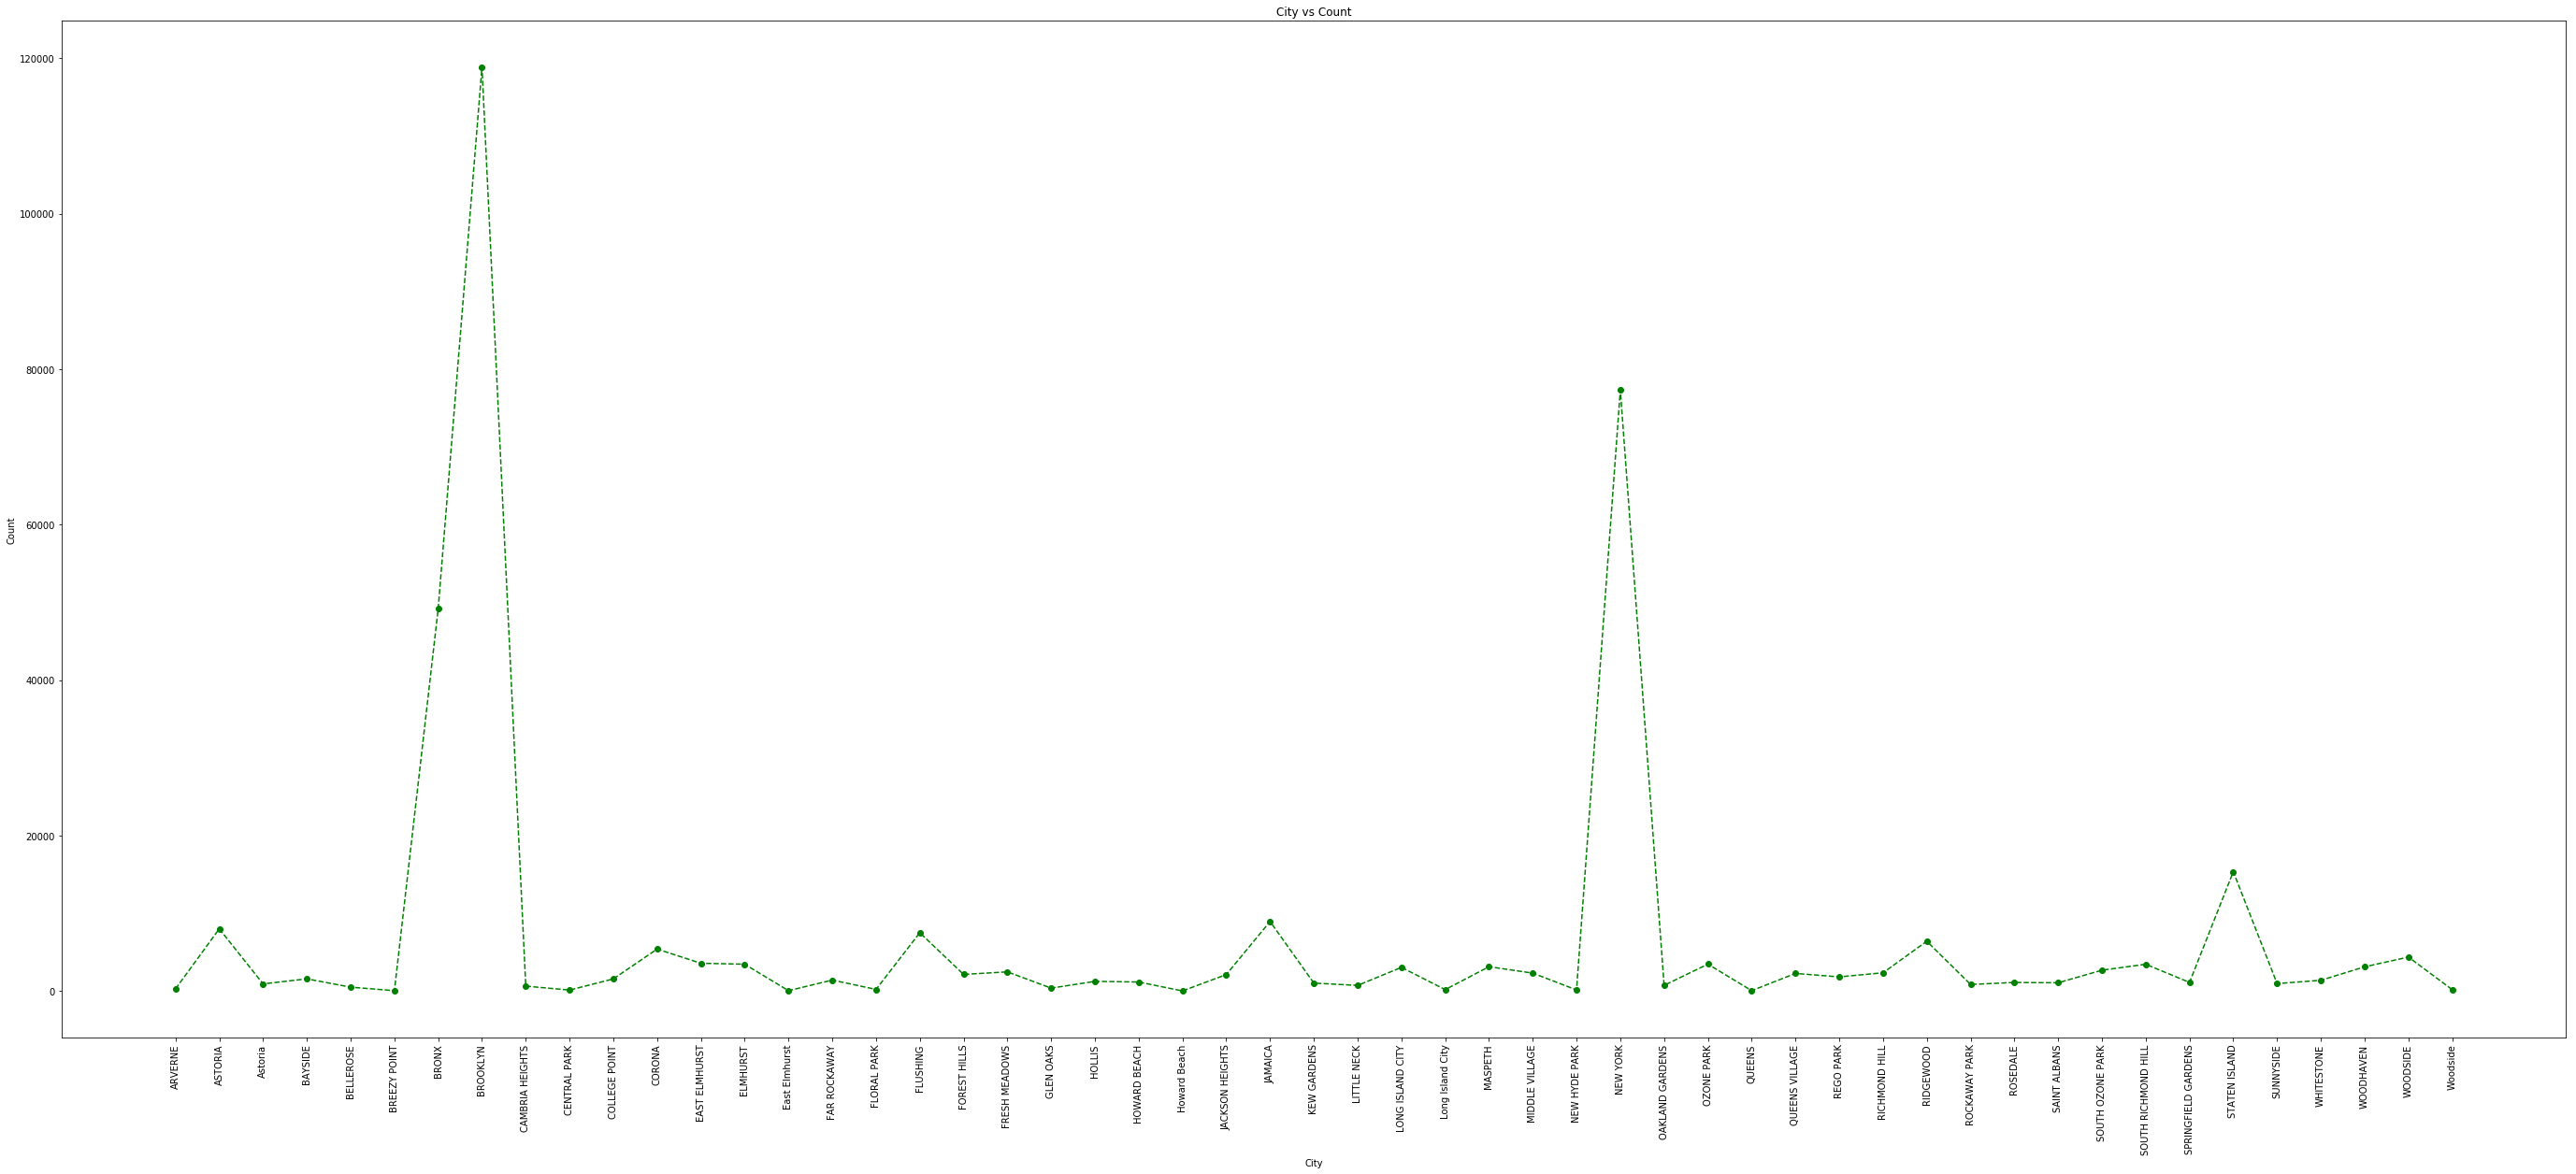

In [64]:
# Displaying cities with maximum complaints

topCities = pd.DataFrame(data['City'].dropna(axis=0)).groupby(['City']).size().reset_index(name='Count')
print(topCities.sort_values('Count',ascending=False))

xaxis = topCities['City']
yaxis = topCities['Count']

plot.plot(xaxis,yaxis,'go--')
plot.xlabel('City')
plot.ylabel('Count')
plot.title('City vs Count')
plot.xticks(range(len(xaxis)),xaxis,rotation='vertical')
plot.rcParams["figure.figsize"] = (30,20)

plot.show()


## Inference ##

Maximum complaints from Brooklyn city
Howard Beach seems to be most peaceful

In [70]:
# Getting top 10 complaint type

complaints = data.groupby(['Complaint Type']).size().reset_index(name='Count')
#top10Complaints.head()
sortedComplaints = complaints.sort_values(['Count'],ascending=False)
top10Complaints = sortedComplaints.head(10)
print top10Complaints

             Complaint Type   Count
4          Blocked Driveway  100881
12          Illegal Parking   92679
16  Noise - Street/Sidewalk   51692
13       Noise - Commercial   44109
5          Derelict Vehicle   21661
17          Noise - Vehicle   19352
1              Animal Abuse   10541
21                  Traffic    5198
10      Homeless Encampment    4879
23                  Vending    4192


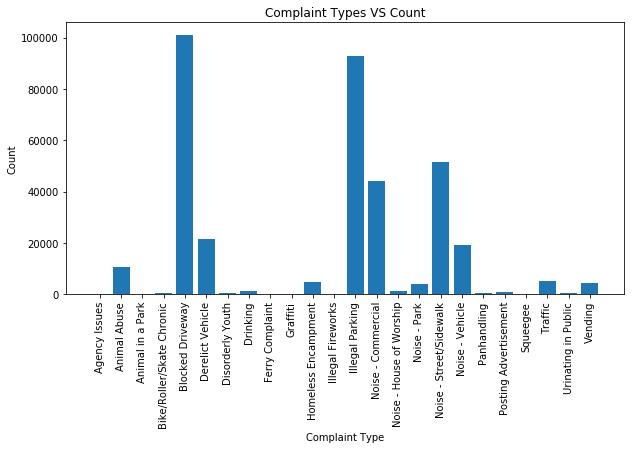

In [71]:
# Plotting bar graph for Complaint Type vs Count

x_axis = complaints['Complaint Type']
y_axis = complaints['Count']
plot.bar(x_axis,y_axis,align='center')
plot.xticks(range(len(x_axis)),x_axis,rotation='vertical')
plot.title('Complaint Types VS Count')
plot.ylabel('Count')
plot.xlabel('Complaint Type')
#plot.rcParams["figure.figsize"] = (30,20)
#plot.figure(figsize=(1,1))
plot.show()

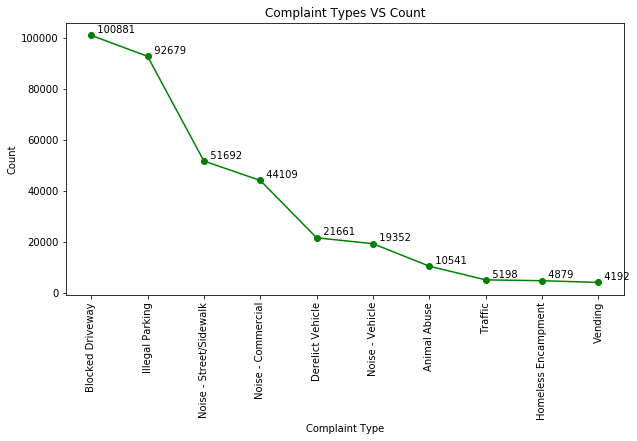

In [72]:
# Displaying major complaint types

compx = top10Complaints['Complaint Type']
compy = top10Complaints['Count']
plot.plot(compx,compy,'go-')
plot.title('Complaint Types VS Count')
plot.ylabel('Count')
plot.xlabel('Complaint Type')
plot.xticks(range(len(compx)),compx,rotation='vertical')
plot.rcParams["figure.figsize"] = 10,5

for a,b in zip(compx, compy): 
    plot.text(a, b+1000, "  "+str(b))
    
plot.show()

In [120]:
testData = data
for name in data.columns.values:
    if len(data[name].mode())>0:
        testData[name].fillna(testData[name].mode()[0])
    else:
        testData.drop(name,axis=1,inplace=True)
for name in testData.columns.values:
    testData[name].fillna(testData[name].mode()[0],inplace=True)


In [82]:
print(len(data.columns.values))

53
